# Describe, compare, contrast the given classifiers

## Perceptron
- Speed: Fast and computationally efficient.
- Strength: Can handle linearly separable data well.
- Robustness: Not robust; fails on non-linearly separable data.
- Feature Type: Naturally uses numerical features since it relies on distance and hyperplane division.
- Statistical: Yes, it is a linear classifier based on the concept of hyperplanes.
- Optimization Problem: Solves a linear optimization problem using the step function as the activation.


## Support Vector Machine (SVM) 
- Speed: Slower for large datasets as it involves solving a quadratic optimization problem.
- Strength: Can handle both linearly and non-linearly separable data using kernel tricks.
- Robustness: Highly robust, especially with the ability to use different kernel functions.
- Feature Type: Primarily numerical, but kernel methods allow it to handle more complex, non-linear relationships.
- Statistical: Yes, it’s a statistical learning method that maximizes the margin between data points.
- Optimization Problem: Maximizes the margin between classes by solving a quadratic optimization problem with constraints.

## Decision Tree
- Speed: Fast to train and interpret, but can slow down with deeper trees.
- Strength: Easy to understand and visualize; handles both numerical and categorical data.
- Robustness: Prone to overfitting, especially with deep trees, unless pruned.
- Feature type: Handles numerical and categorical features well.
- Statistical: Non-statistical, based on a series of binary decisions.
- Optimization: Greedily splits data based on a criterion (like Gini impurity or entropy) at each node, without solving a global optimization problem.

## Random Forest
- Speed: Slower than Decision Trees due to training multiple trees, but parallelizable.
- Strength: Very powerful and reduces overfitting by averaging multiple trees.
- Robustness: Highly robust due to ensemble learning; handles noise better than a single Decision Tree.
- Feature type: Works with both numerical and categorical data, like Decision Trees.
- Statistical: Built from Decision Trees, which are non-statistical, but ensemble learning adds a layer of statistical robustness.
- Optimization: Not based on direct optimization; it aggregates results from multiple Decision Trees to minimize variance.

## Which one to try first?
I would try Random Forest first because of its robustness and ability to handle both numerical and categorical features, along with its ensemble learning ability, which may reduce overfitting.

# Feature Types with Examples

## Numerical 
- Quantitative data representing measurable quantities.
  - Example: Age in the Iris dataset (e.g., 23, 45, 34).

## Nominal
- Categorical data without any order.
    - Example: Species in the Iris dataset (e.g., Setosa, Versicolor, Virginica).

## Date
- Data representing specific dates.
    - Example: Admission date in a university application dataset (e.g., 2023-09-07).

## Text
- Unstructured textual data
    - Example: Reviews from a product dataset (e.g., "The product was amazing!")

## Image
- Data in form of pixel values or image representation. 
    - Example: A 30x30 pixel image of digits that were handwritten from the MNIST dataset

## Dependent Variable
- The target variable that the model is tring to predict (dependent y value)
    - Example: In the ADMISSION_PREDICT dataset, the dependent variable could be Chance_of_Admit (e.g., 0.75, 0.92).

# Classifier Performance Metrics

### Definitions 
- **True Positive (TP)**: A true positive occurs when a model correctly predicts the positive class.
- **False Negative (FN)**: A false negative occurs when a model incorrectly predicts the negative class for a positive instance.
- **False Positive (FP)**: A false positive occurs when a model incorrectly predicts the positive class for a negative instance.


## Precision
Precision measures the accuracy of positive predictions. It answers, "Of all the positive results we predicted, how many were actually correct?"

**Equation**:  
 $$ 
  \text{Precision} = \frac{TP}{TP + FP}
  $$
  where:
  $$( TP ) = \textit{True Positives}$$
  $$( FP ) = \textit{False Positives}$$



## Recall
Measures the ability to capture true positives. It answers, "Of all the actual positive cases, how many did we correctly identify?"

**Equation**:
    $$
    \text{Recall} = \frac{TP}{TP + FN}
    $$
    where:
    $$( TP ) = \textit{True Positives}$$
    $$( FN ) = \textit{False Negatives}$$

## F1 Score
The F1 score is the harmonic mean of precision and recall, providing a balance between them when there's an uneven class distribution.

**Equation**:
    $$F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$

## ROC AUC (Receiver Operating Characteristic Area Under Curve)
AUC measures the overall performance of the classifier by comparing the true positive rate (TPR) and false positive rate (FPR) across thresholds.

**Equation**:
    $$\text{AUC} = \int_{0}^{1} \text{ROC curve}$$

# Implement a Correlation Program

In [1]:
import csv
import math

#load the dataset 
data=[]
with open('/Users/bandito/Documents/FA24/jhujourney/week_2/Admission_Predict_Ver1.1.csv', newline='') as csvfile:
    reader=csv.DictReader(csvfile)
    for row in reader:
        data.append({k: float(v) for k, v in row.items() if k!= 'Serial No'})
        
# convert into columns 
columns = {key: [row[key] for row in data] for key in data[0].keys()}

# Function to compute mean
def mean(column):
    return sum(column) / len(column)

# Function to compute standard deviation
def stdev(column, mean_val):
    variance = sum((x - mean_val) ** 2 for x in column) / (len(column) - 1)
    return math.sqrt(variance)

# Function to compute Pearson correlation coefficient between two features
def correlation(col1, col2):
    mean1, mean2 = mean(col1), mean(col2)
    stdev1, stdev2 = stdev(col1, mean1), stdev(col2, mean2)
    
    covariance = sum((x1 - mean1) * (x2 - mean2) for x1, x2 in zip(col1, col2)) / (len(col1) - 1)
    
    return covariance / (stdev1 * stdev2)

# Calculate the correlation matrix
features = list(columns.keys())
correlation_matrix = []
for i in range(len(features)):
    row = []
    for j in range(len(features)):
        row.append(correlation(columns[features[i]], columns[features[j]]))
    correlation_matrix.append(row)

# Print correlation matrix
print("Correlation Matrix:")
for row in correlation_matrix:
    print(row)

# Verify using pandas DataFrame.corr()
import pandas as pd
df = pd.DataFrame(data)
print("\nVerification using pandas DataFrame.corr():")
print(df.corr())

Correlation Matrix:
[1.0, -0.10383870097143129, -0.14169599989799875, -0.06764057145813802, -0.1373519716150825, -0.003694454958089926, -0.07428898991444587, -0.005331685188964249, 0.008505049361131995]
[-0.10383870097143129, 0.9999999999999999, 0.8272004035317221, 0.6353762113239015, 0.6134976734624114, 0.524679392581708, 0.8258779536403565, 0.5633981217777579, 0.8103506354632608]
[-0.14169599989799875, 0.8272004035317221, 1.0, 0.649799195146806, 0.6444103878875823, 0.5415632950080242, 0.8105735363036228, 0.4670120606097339, 0.7922276143050835]
[-0.06764057145813802, 0.6353762113239015, 0.649799195146806, 0.9999999999999998, 0.7280235718785817, 0.6086507072838141, 0.7052543450861949, 0.42704745181334874, 0.6901323687886892]
[-0.1373519716150825, 0.6134976734624114, 0.6444103878875823, 0.7280235718785817, 1.0, 0.6637068525149349, 0.7121543243652508, 0.4081158457917927, 0.6841365241316726]
[-0.003694454958089926, 0.524679392581708, 0.5415632950080242, 0.6086507072838141, 0.6637068525149

## Display the Correlation matrix

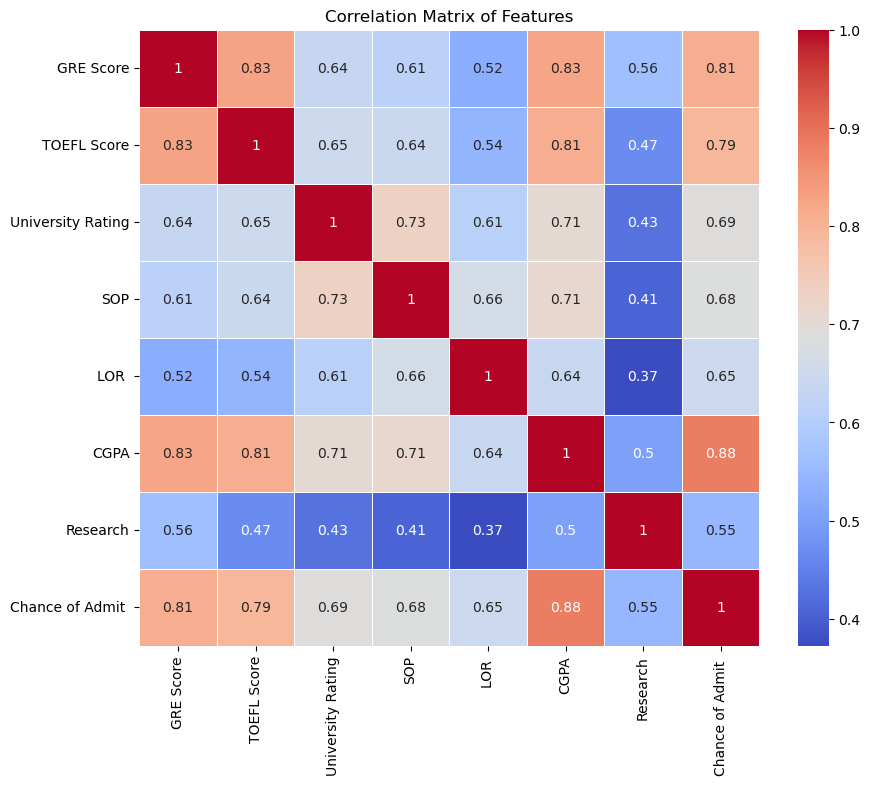

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load dataset from a CSV file
data = pd.read_csv('/Users/bandito/Documents/FA24/jhujourney/week_2/Admission_Predict_Ver1.1.csv')

# Remove the 'Serial No' column
data = data.drop('Serial No.', axis=1)

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()


## Should we use 'Serial No'? Why or why not?

No, we should not use 'Serial No' in correlation analysis because it is simply an identifier for each instance and has no relationship with the other features. It does not provide meaningful information for predicting any dependent variable.

## Why does the diagonal of the correlation matrix have all 1's?

The diagonal of the correlation matrix represents the correlation of each feature with itself. Since any feature is perfectly correlated with itself, the value is always 1.0.


## What do you think about the correlations between all the variables?

The correlations between variables can help us understand the linear relationships between different features. High positive or negative correlations indicate a strong linear relationship, while values near 0 indicate weak or no linear relationship.

## Which variable should be the most important to try to predict 'Chance of Admit'?

The feature that has the highest positive correlation with the 'Chance of Admit' variable should be considered the most important. For instance, 'GRE Score', 'TOEFL Score', or 'CGPA' might show high correlation, and these features would be significant in predicting the 'Chance of Admit'.